# Homework 1: Matplotlib

All exercises will work on the Australia Fire dataset:

https://www.kaggle.com/carlosparadis/fires-from-space-australia-and-new-zeland

We will work with fire_nrt_V1_96617.csv which is described here:

https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/viirs-i-band-active-firedata


## Import Libraries

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import kde

import math

## Task 1: Density Plots

1.1 Plot the longitude vs latitude several ways within a single figure (each in its own axes):
1) Using the matplotlib defaults.

2) Adjusting alpha and marker size to compensate for overplotting.

3) Using a hexbin plot.

4) Subsampling the dataset.

For each but the first one, ensure that all the plotting area is used in a reasonable way and that
as much information as possible is conveyed; this is somewhat subjective and there is no one
right answer. [45 pts]

1.2 In what areas are most of the anomalies (measurements) located? [5pts]

In [2]:
df = pd.read_csv('fire_nrt_V1_96617.csv')

In [3]:
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [57]:
x = df["longitude"]
y = df["latitude"]

In [58]:
# create variable to sample 10% of the data set

proportion = 0.10

num_samples = math.floor(proportion * len(x))
subsample = np.random.choice(np.arange(len(x)), num_samples)

x_subsample = x[subsample]
y_subsample = y[subsample]

print("Original data set size: {}".format(f'{len(x) :,}'))
print("Sample data set size: {}".format(f'{num_samples :,}'))

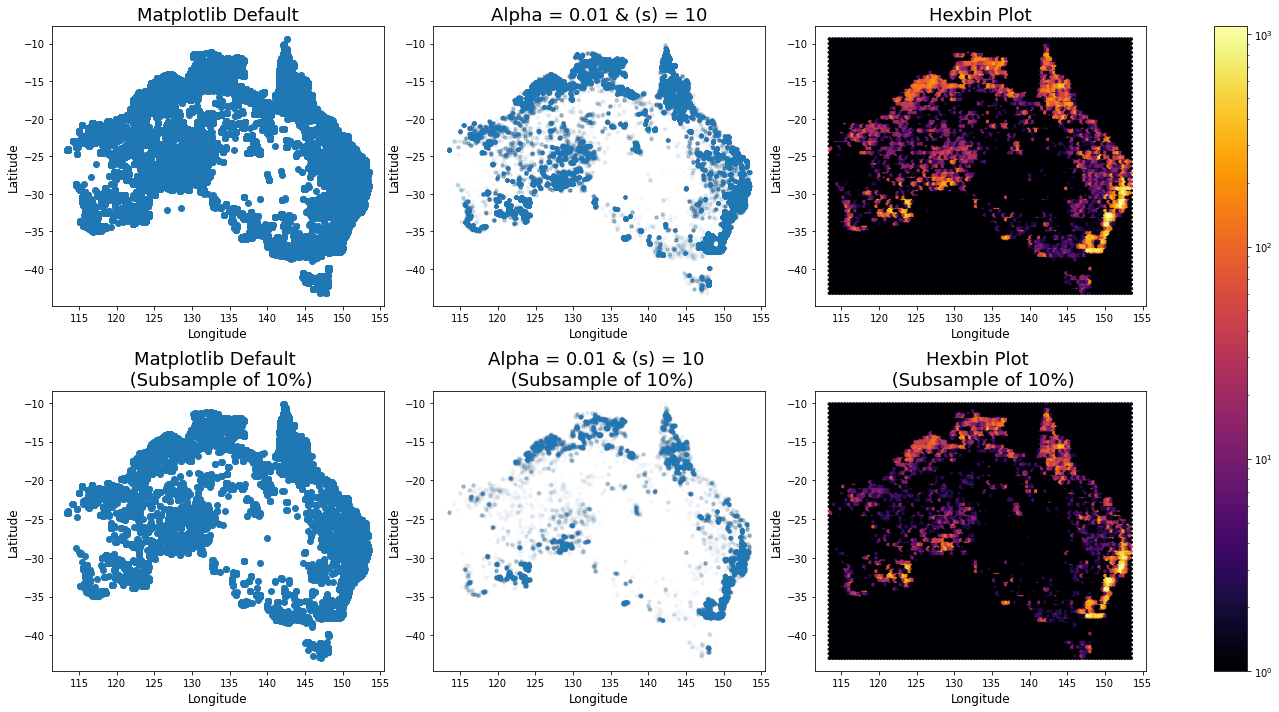

In [109]:
fig, axes = plt.subplots(2,3, figsize = (20,10))

# 1) Matplotlib default
axes[0,0].scatter(x, y)
axes[0,0].set_xlabel('Longitude', fontsize = 12)
axes[0,0].set_ylabel('Latitude', fontsize = 12)
axes[0,0].set_title("Matplotlib Default", fontsize = 18)

axes[1,0].scatter(x_subsample, y_subsample)
axes[1,0].set_xlabel('Longitude', fontsize = 12)
axes[1,0].set_ylabel('Latitude', fontsize = 12)
axes[1,0].set_title("Matplotlib Default \n (Subsample of 10%)", fontsize = 18)

# 2) Adjusting alpha and marker size to compensate for overplotting
axes[0,1].scatter(x, y, alpha = 0.01, s = 10)
axes[0,1].set_xlabel('Longitude', fontsize = 12)
axes[0,1].set_ylabel('Latitude', fontsize = 12)
axes[0,1].set_title("Alpha = 0.01 & (s) = 10", fontsize = 18)

axes[1,1].scatter(x_subsample, y_subsample, alpha = 0.01, s = 10)
axes[1,1].set_xlabel('Longitude', fontsize = 12)
axes[1,1].set_ylabel('Latitude', fontsize = 12)
axes[1,1].set_title("Alpha = 0.01 & (s) = 10 \n (Subsample of 10%)", fontsize = 18)

# 3) Using a hexbin plot
h = axes[0,2].hexbin(x, y, bins = "log", cmap = "inferno")
axes[0,2].set_xlabel('Longitude', fontsize = 12)
axes[0,2].set_ylabel('Latitude', fontsize = 12)
axes[0,2].set_title("Hexbin Plot", fontsize = 18)

h = axes[1,2].hexbin(x_subsample, y_subsample, bins = "log", cmap = "inferno")
axes[1,2].set_xlabel('Longitude', fontsize = 12)
axes[1,2].set_ylabel('Latitude', fontsize = 12)
axes[1,2].set_title("Hexbin Plot \n (Subsample of 10%)", fontsize = 18)


plt.tight_layout()
fig.colorbar(h, ax=axes.ravel().tolist())
plt.show()

- It looks like most of the anomalies are presented around the borders, but more specifically in the north and the east as shown in the heatmap

## Task 2: Visualizing Class Membership

Visualize the distribution of Brightness temperature I-4 as a histogram (with appropriate
settings). Let’s assume we are certain of a fire if the value of temperature I-4 is saturated as
visible from the histogram.

2.1 Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vs
long for those points with brightness saturated and a separate for those who are not (within the
same figure on separate axes). You can pick any of the methods from 1.1 that you find most
suitable. Can you spot differences in the distributions?

2.2 Plot both groups in the same axes with different colors. Try changing the order of plotting
the two classes (i.e. draw the saturated first then the non-saturated or the other way around).
Make sure to include a legend. How does that impact the result?

2.3 Can you find a better way to compare the two distributions?

In [112]:
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


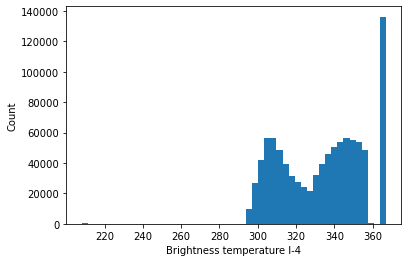

In [117]:
plt.hist(df['bright_ti4'], bins = 50)
plt.xlabel('Brightness temperature I-4')
plt.ylabel('Count')
plt.show()

It looks like a brightness temperature of > 360 is saturated

In [131]:
df['bright_ti4'][df['bright_ti4'] > 360].value_counts()

367.0    136180
Name: bright_ti4, dtype: int64

More specifically, an exact temperature of 367 seems to be the peak brightness for saturation levels.

In [145]:
temp_saturated = df['bright_ti4'][df['bright_ti4'] > 360].unique()[0]

Now will create 2 data frames with saturated and non-saturated temperatures

In [152]:
saturated_df = df[df['bright_ti4'] == temp_saturated].reset_index(drop=True)
non_saturated_df = df[df['bright_ti4'] != temp_saturated].reset_index(drop=True)

In [154]:
long_saturated = saturated_df["longitude"]
lat_saturated = saturated_df["latitude"]

long_non_saturated = non_saturated_df["longitude"]
lat_non_saturated = non_saturated_df["latitude"]

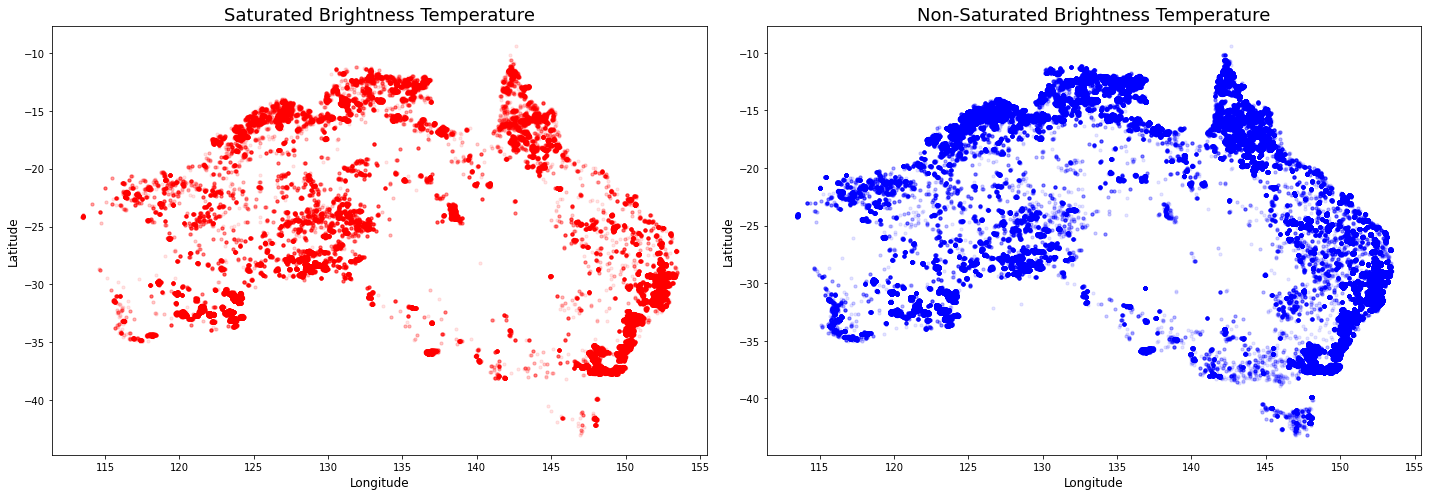

In [171]:
# plot saturated vs non saturated

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# saturated
ax[0].scatter(long_saturated, lat_saturated, s=10, alpha = 0.1, color = "red")
ax[0].set_title("Saturated Brightness Temperature", fontsize = 18)
ax[0].set_xlabel('Longitude', fontsize = 12)
ax[0].set_ylabel('Latitude', fontsize = 12)

# non saturated
ax[1].scatter(long_non_saturated, lat_not_saturated, s=10, alpha = 0.1, color = "blue")
ax[1].set_title("Non-Saturated Brightness Temperature", fontsize = 18)
ax[1].set_xlabel('Longitude', fontsize = 12)
ax[1].set_ylabel('Latitude', fontsize = 12)

plt.tight_layout()
plt.show()

- Non-Saturated brightness appears more densely on the eastern border
- Saturated brightness appears to be less dense

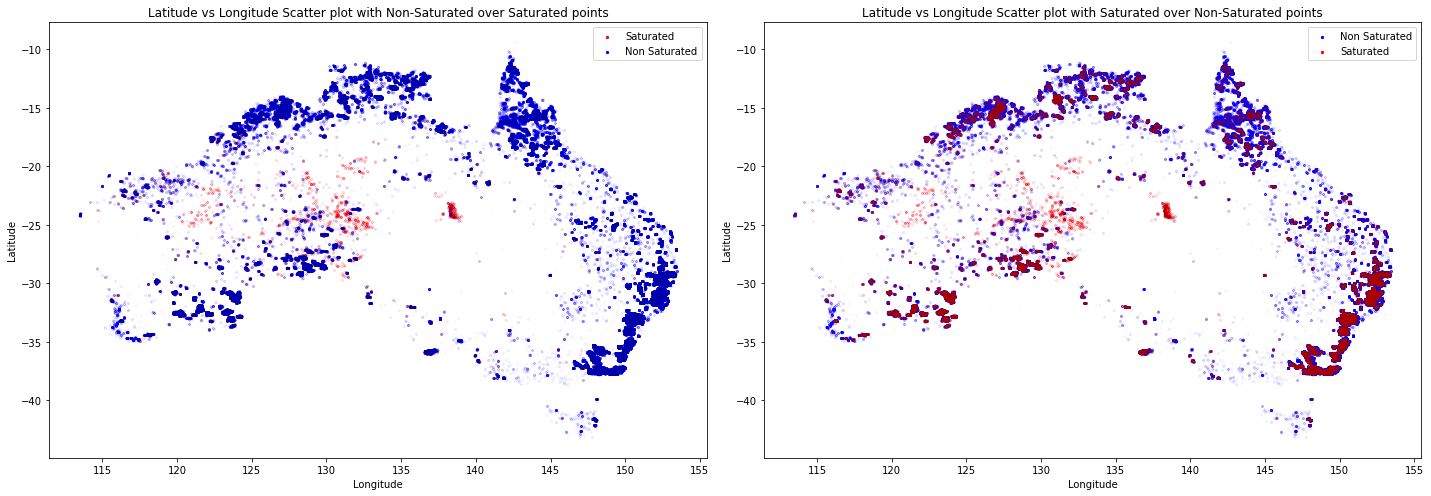

In [173]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].scatter(long_saturated, lat_saturated, s=5, alpha = 0.01, color = "red" , label = "Saturated")
ax[0].scatter(long_not_saturated, lat_not_saturated, s=5, alpha = 0.01, color = "blue", label = "Non Saturated")
leg = ax[0].legend()
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

for lh in leg.legendHandles: 
    lh.set_alpha(1)

ax[1].scatter(long_not_saturated, lat_not_saturated, s=5, alpha = 0.01, color = "blue", label = "Non Saturated")
ax[1].scatter(long_saturated, lat_saturated, s=5, alpha = 0.01, color = "red" , label = "Saturated")
leg = ax[1].legend()
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

ax[0].set_title("Latitude vs Longitude Scatter plot with Non-Saturated over Saturated points")
ax[1].set_title("Latitude vs Longitude Scatter plot with Saturated over Non-Saturated points")
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.tight_layout()
plt.show()

- Plotting saturated on top of the non saturated allows for better visibility for the overlap. Most of the densely populated saturated points occur along with the densely populated areas of the non saturated

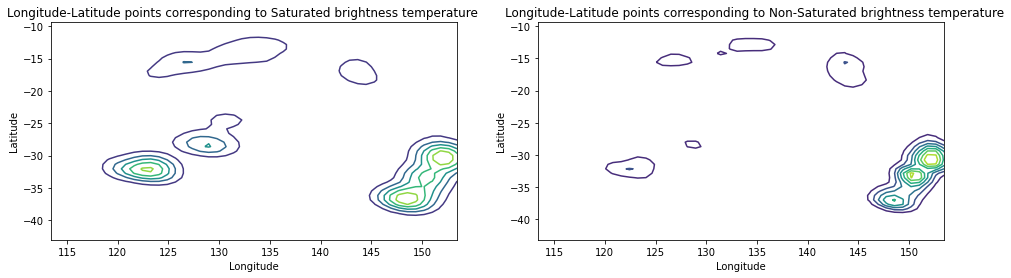

In [176]:
nbins = 50
x,y = long_saturated, lat_saturated
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

xj,yj = long_not_saturated, lat_not_saturated
kj = kde.gaussian_kde([xj,yj])
xii, yii = np.mgrid[xj.min():xj.max():nbins*1j, yj.min():yj.max():nbins*1j]
zii = kj(np.vstack([xii.flatten(), yii.flatten()]))

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].contour(xi, yi, zi.reshape(xi.shape))
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
 
ax[1].contour(xii, yii, zii.reshape(xii.shape))
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

ax[0].set_title("Longitude-Latitude points corresponding to Saturated brightness temperature      ")
ax[1].set_title("       Longitude-Latitude points corresponding to Non-Saturated brightness temperature")

plt.show()

- Contours allow us to more easily see the concentration of saturated and non-saturated points